In [1]:
"""
Milestone 2: Model Training & Evaluation
Project: JobCheck – Fake Job Detection using NLP
"""

print("Milestone 2 started...")


Milestone 2 started...


In [2]:
import numpy as np
import pandas as pd
import pickle
import os
import time
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
print("Loading data from Milestone 1...")

# Load processed dataset
df = pd.read_csv("processed_data/processed_jobs.csv")

# Load labels
y_train = np.load("processed_data/y_train.npy")
y_test = np.load("processed_data/y_test.npy")

# Load TF-IDF vectorizer
with open("processed_data/tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

print("Data loaded successfully.")
print("Total records:", df.shape[0])


Loading data from Milestone 1...
Data loaded successfully.
Total records: 17880


In [4]:
# Convert cleaned text into TF-IDF features
X = tfidf_vectorizer.transform(df["cleaned_text"])
y = df["fraudulent"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Feature matrix shape:", X.shape)


Feature matrix shape: (17880, 5000)


In [5]:
print("Training Logistic Regression model...")

start_time = time.time()

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

end_time = time.time()

print("Training time:", round(end_time - start_time, 2), "seconds")


Training Logistic Regression model...
Training time: 0.23 seconds


In [6]:
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))


Accuracy: 0.9723154362416108

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       1.00      0.43      0.60       173

    accuracy                           0.97      3576
   macro avg       0.99      0.71      0.79      3576
weighted avg       0.97      0.97      0.97      3576

ROC-AUC Score: 0.974935410611854


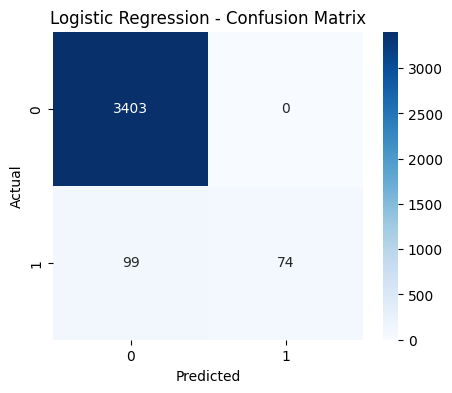

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
os.makedirs("milestone2_models", exist_ok=True)

with open("milestone2_models/logistic_regression.pkl", "wb") as f:
    pickle.dump(lr_model, f)

print("Logistic Regression model saved.")


Logistic Regression model saved.


In [9]:
print("Training Random Forest model...")

rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print("Random Forest training completed.")


Training Random Forest model...
Random Forest training completed.


In [10]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))


Accuracy: 0.9706375838926175

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3403
           1       1.00      0.39      0.56       173

    accuracy                           0.97      3576
   macro avg       0.99      0.70      0.77      3576
weighted avg       0.97      0.97      0.96      3576

ROC-AUC Score: 0.9661230570102205


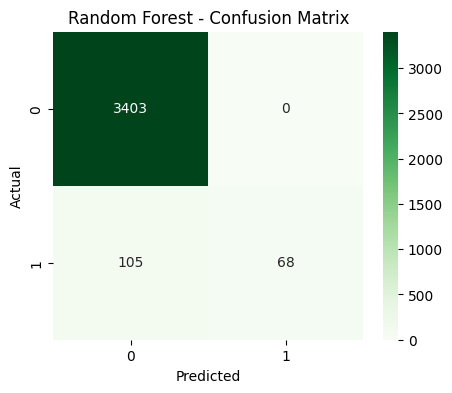

In [11]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


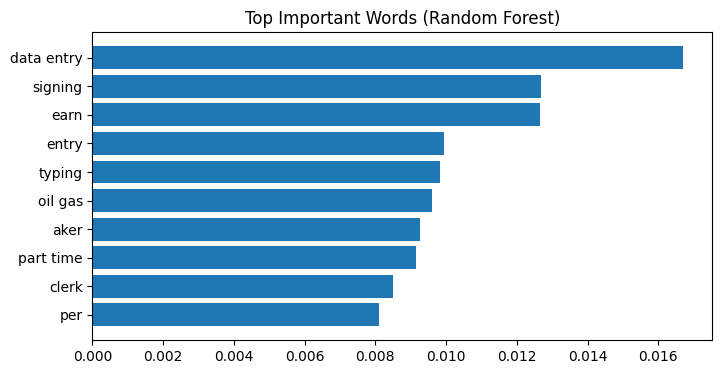

In [12]:
importances = rf_model.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

top_indices = np.argsort(importances)[-10:]
top_features = feature_names[top_indices]

plt.figure(figsize=(8,4))
plt.barh(top_features, importances[top_indices])
plt.title("Top Important Words (Random Forest)")
plt.show()


In [13]:
with open("milestone2_models/random_forest.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Random Forest model saved.")


Random Forest model saved.


## Model Comparison (Milestone 2)

- Logistic Regression: Fast and simple baseline model
- Random Forest: Higher accuracy and better performance

**Final Selection:** Random Forest was selected due to better accuracy.
